Prelude: Understanding the XOR Problem in the Context of a Single-Layer Perceptron
The exclusive OR (XOR) function is a fundamental logical operation that outputs true only when the inputs differ. For binary inputs, the XOR truth table is:

| X1 | X2 | Y |
|----|----|---|
| 0  | 0  | 0 |
| 0  | 1  | 1 |
| 1  | 0  | 1 |
| 1  | 1  | 0 |

At first glance, XOR may seem simple. However, it poses a well-known challenge in neural networks, especially when using a single-layer perceptron. A single-layer perceptron is a type of linear classifier that can only solve problems where the data is linearly separable—meaning a single straight line (or hyperplane in higher dimensions) can divide the classes.

The XOR function is not linearly separable, as there is no single straight line that can separate the 1s and 0s in the XOR output. This makes XOR a classic example that demonstrates the limitations of single-layer perceptrons and was historically significant in the development of deeper neural architectures.

Understanding the failure of a single-layer perceptron on XOR leads to a crucial insight: some functions require non-linearity and multiple layers (as in multilayer perceptrons or MLPs) to be modeled correctly. This realization paved the way for the development of backpropagation and the rise of deep learning.

Epoch 1: Total Error = 2
Epoch 2: Total Error = 2
Epoch 3: Total Error = 3
Epoch 4: Total Error = 3
Epoch 5: Total Error = 2
Epoch 6: Total Error = 3
Epoch 7: Total Error = 1
Epoch 8: Total Error = 3
Epoch 9: Total Error = 3
Epoch 10: Total Error = 4
Epoch 11: Total Error = 4
Epoch 12: Total Error = 4
Epoch 13: Total Error = 4
Epoch 14: Total Error = 4
Epoch 15: Total Error = 4
Epoch 16: Total Error = 4
Epoch 17: Total Error = 4
Epoch 18: Total Error = 4
Epoch 19: Total Error = 4
Epoch 20: Total Error = 4


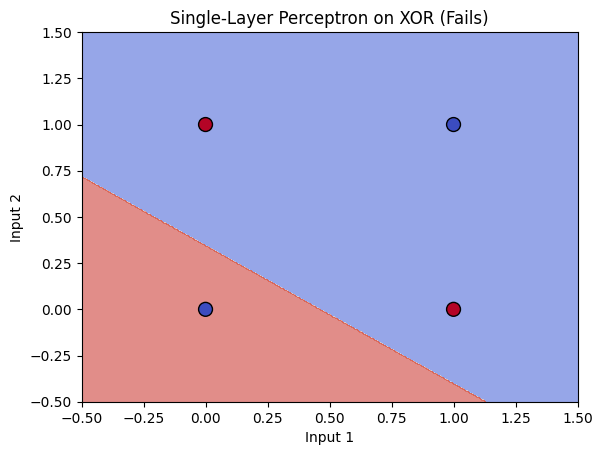

Predictions:
Input: [0 0], Output: 1
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 0


In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0]) 

epochs = 20
lr = 0.1
np.random.seed(42)

weights = np.random.randn(2)
bias = np.random.randn()

def step(x):
    return 1 if x >= 0 else 0

for epoch in range(epochs):
    total_error = 0
    for xi, target in zip(X, y):
        z = np.dot(xi, weights) + bias
        output = step(z)
        error = target - output

        weights += lr * error * xi
        bias += lr * error
        total_error += abs(error)
    print(f"Epoch {epoch+1}: Total Error = {total_error}")

def predict(x):
    return step(np.dot(x, weights) + bias)

def plot_decision_boundary():
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = np.array([predict([x, y]) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=100)
    plt.title("Single-Layer Perceptron on XOR (Fails)")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

plot_decision_boundary()

print("Predictions:")
for xi in X:
    print(f"Input: {xi}, Output: {predict(xi)}")

As seen from the above graph that a single straight line does not sperate the points since they are not lineraly separable.
This problem can be solved in two ways-
* Transforming the inputs before finding error and input
* Using a multilayer perceptron

# Transforming the inputs

Epoch 0: Loss = 1.5909
Epoch 1000: Loss = 0.0190
Epoch 2000: Loss = 0.0047
Epoch 3000: Loss = 0.0021
Epoch 4000: Loss = 0.0011
Epoch 5000: Loss = 0.0007
Epoch 6000: Loss = 0.0005
Epoch 7000: Loss = 0.0004
Epoch 8000: Loss = 0.0003
Epoch 9000: Loss = 0.0002

Final Predictions:
Input: [0 0], Target: 0, Predicted: 0
Input: [0 1], Target: 1, Predicted: 1
Input: [1 0], Target: 1, Predicted: 1
Input: [1 1], Target: 0, Predicted: 0


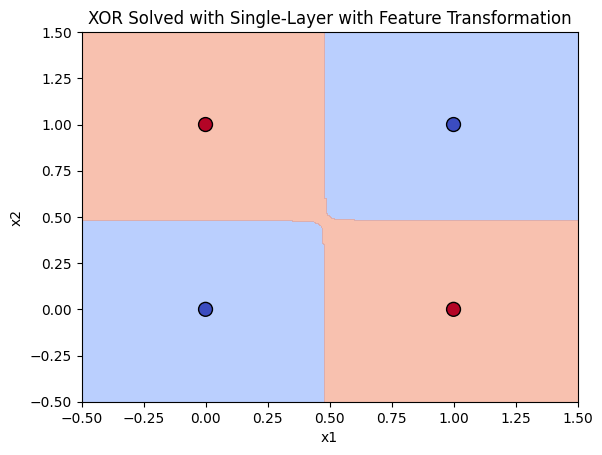

In [13]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
])
y = np.array([0, 1, 1, 0])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


np.random.seed(42)
weights = np.random.randn(3)
bias = np.random.randn()
lr = 0.1
epochs = 10000

for epoch in range(epochs):
    total_loss = 0
    for xi, target in zip(X, y):
        z = np.dot(xi, weights) + bias
        output = sigmoid(z)
        error = target - output
        loss = error**2
        total_loss += loss
        
        output = sigmoid(z)
        d_output = output - target
        weights -= lr * d_output * xi
        bias -= lr * d_output

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {total_loss:.4f}")

def predict(x1, x2):
    x3 = x1 * x2
    x = np.array([x1, x2, x3])
    z = np.dot(x, weights) + bias
    return sigmoid(z) >= 0.5

print("\nFinal Predictions:")
for xi, target in zip(X, y):
    pred = predict(xi[0], xi[1])
    print(f"Input: {xi[:2]}, Target: {target}, Predicted: {int(pred)}")

def plot_decision_boundary():
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = []
    for x1, x2 in zip(xx.ravel(), yy.ravel()):
        Z.append(predict(x1, x2))
    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=100)
    plt.title("XOR Solved with Single-Layer with Feature Transformation")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

plot_decision_boundary()


From the above graph it is evident that it can be made lineraly separable by transformation but it cannot be separated using a single line using a single layer perceptron

# Multilayer percptron (MLP)

C:\Users\Abhay\AppData\Local\Temp\ipykernel_15680\1380011381.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(l2 > 0.5)


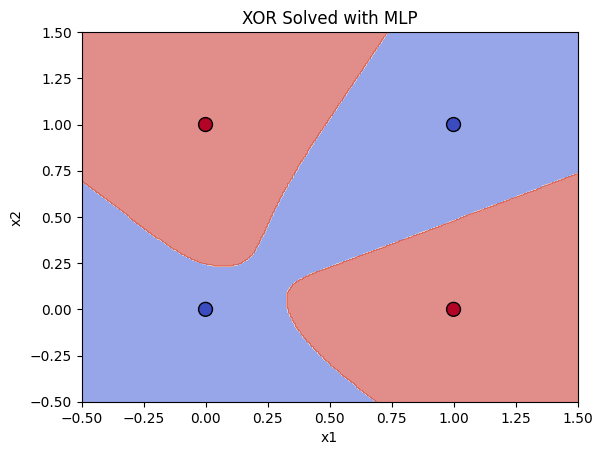

In [15]:
import numpy as np
np.random.seed(0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sx):
    return sx * (1 - sx)

def cost(predicted, truth):
    return truth - predicted

xor_input = np.array([[0,0], [0,1], [1,0], [1,1]])
xor_output = np.array([[0,1,1,0]]).T

X = xor_input
Y = xor_output

num_data, input_dim = X.shape
hidden_dim = 5
W1 = np.random.random((input_dim, hidden_dim))

output_dim = len(Y.T)
W2 = np.random.random((hidden_dim, output_dim))

num_epochs = 10000
learning_rate = 1.0

for epoch_n in range(num_epochs):
    layer0 = X
    
    layer1 = sigmoid(np.dot(layer0, W1))
    layer2 = sigmoid(np.dot(layer1, W2))

    
    layer2_error = cost(layer2, Y)
    layer2_delta = layer2_error * sigmoid_derivative(layer2)

    
    layer1_error = np.dot(layer2_delta, W2.T)
    layer1_delta = layer1_error * sigmoid_derivative(layer1)
    
    W2 +=  learning_rate * np.dot(layer1.T, layer2_delta)
    W1 +=  learning_rate * np.dot(layer0.T, layer1_delta)

def predict(x1, x2):
    inp = np.array([[x1, x2]])
    l1 = sigmoid(np.dot(inp, W1))
    l2 = sigmoid(np.dot(l1, W2))
    return int(l2 > 0.5)

def plot_decision_boundary():
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    Z = np.array([predict(x1, x2) for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), cmap=plt.cm.coolwarm, edgecolors='k', s=100)
    plt.title("XOR Solved with MLP")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


plot_decision_boundary()

This is XOR gate implemented using multilayer perceptron which gives precise classification